In [33]:
%matplotlib inline

import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import math
import random
from sklearn.datasets import make_blobs
from sklearn import metrics
import scipy.io


## FCF random step experiment

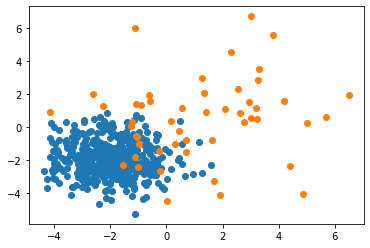

In [27]:
def single_blob_noise(n1, n2):
    blobs_params = dict(n_samples=n1, n_features=2)
    normal = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=[1, 1], **blobs_params)[0]
    blobs_params = dict(n_samples=n2, n_features=2)
    anomal = make_blobs(centers=[[1, 1], [4, 4]], cluster_std=[2,2], **blobs_params)[0]
    return normal - 2, anomal - 2

sbn_n, sbn_a = single_blob_noise(500, 50)
plt.scatter(x=sbn_n[:,0], y=sbn_n[:,1])
plt.scatter(x=sbn_a[:,0], y=sbn_a[:,1])

In [28]:
data = np.concatenate([sbn_n, sbn_a])

In [29]:
from src.FairCutForestRandomStep import FairCutForest

model = FairCutForest(100,256,1,'full', 0.2)
model.fit(data)
model1 = FairCutForest(100,256,1,'full', 0.4)
model1.fit(data)
model2 = FairCutForest(100,256,1,'full', 0.6)
model2.fit(data)
model3 = FairCutForest(100,256,1,'full', 0.8)
model3.fit(data)
model4 = FairCutForest(100,256,1,'full', 1)
model4.fit(data)
model5 = FairCutForest(100,256,1,'full', 0)
model5.fit(data)

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [32]:
size = 10
granularity = 50
normalize=True
xx, yy = np.meshgrid(np.linspace(-size, size, granularity), np.linspace(-size, size, granularity))
hm = np.c_[xx.ravel(), yy.ravel()]

pred = model.predict(hm)
pred1 = model1.predict(hm)
pred2 = model2.predict(hm)
pred3 = model3.predict(hm)
pred4 = model4.predict(hm)
pred5 = model5.predict(hm)

if normalize:
    pred = (pred - pred.min()) / (pred.max() - pred.min())
    pred1 = (pred1 - pred1.min()) / (pred1.max() - pred1.min())
    pred2 = (pred2 - pred2.min()) / (pred2.max() - pred2.min())
    pred3 = (pred3 - pred3.min()) / (pred3.max() - pred3.min())
    pred4 = (pred4 - pred4.min()) / (pred4.max() - pred4.min())
    pred5 = (pred5 - pred5.min()) / (pred5.max() - pred5.min())

heatmap = pred.reshape(xx.shape)
heatmap1 = pred1.reshape(xx.shape)
heatmap2 = pred2.reshape(xx.shape)
heatmap3 = pred3.reshape(xx.shape)
heatmap4 = pred4.reshape(xx.shape)
heatmap5 = pred5.reshape(xx.shape)

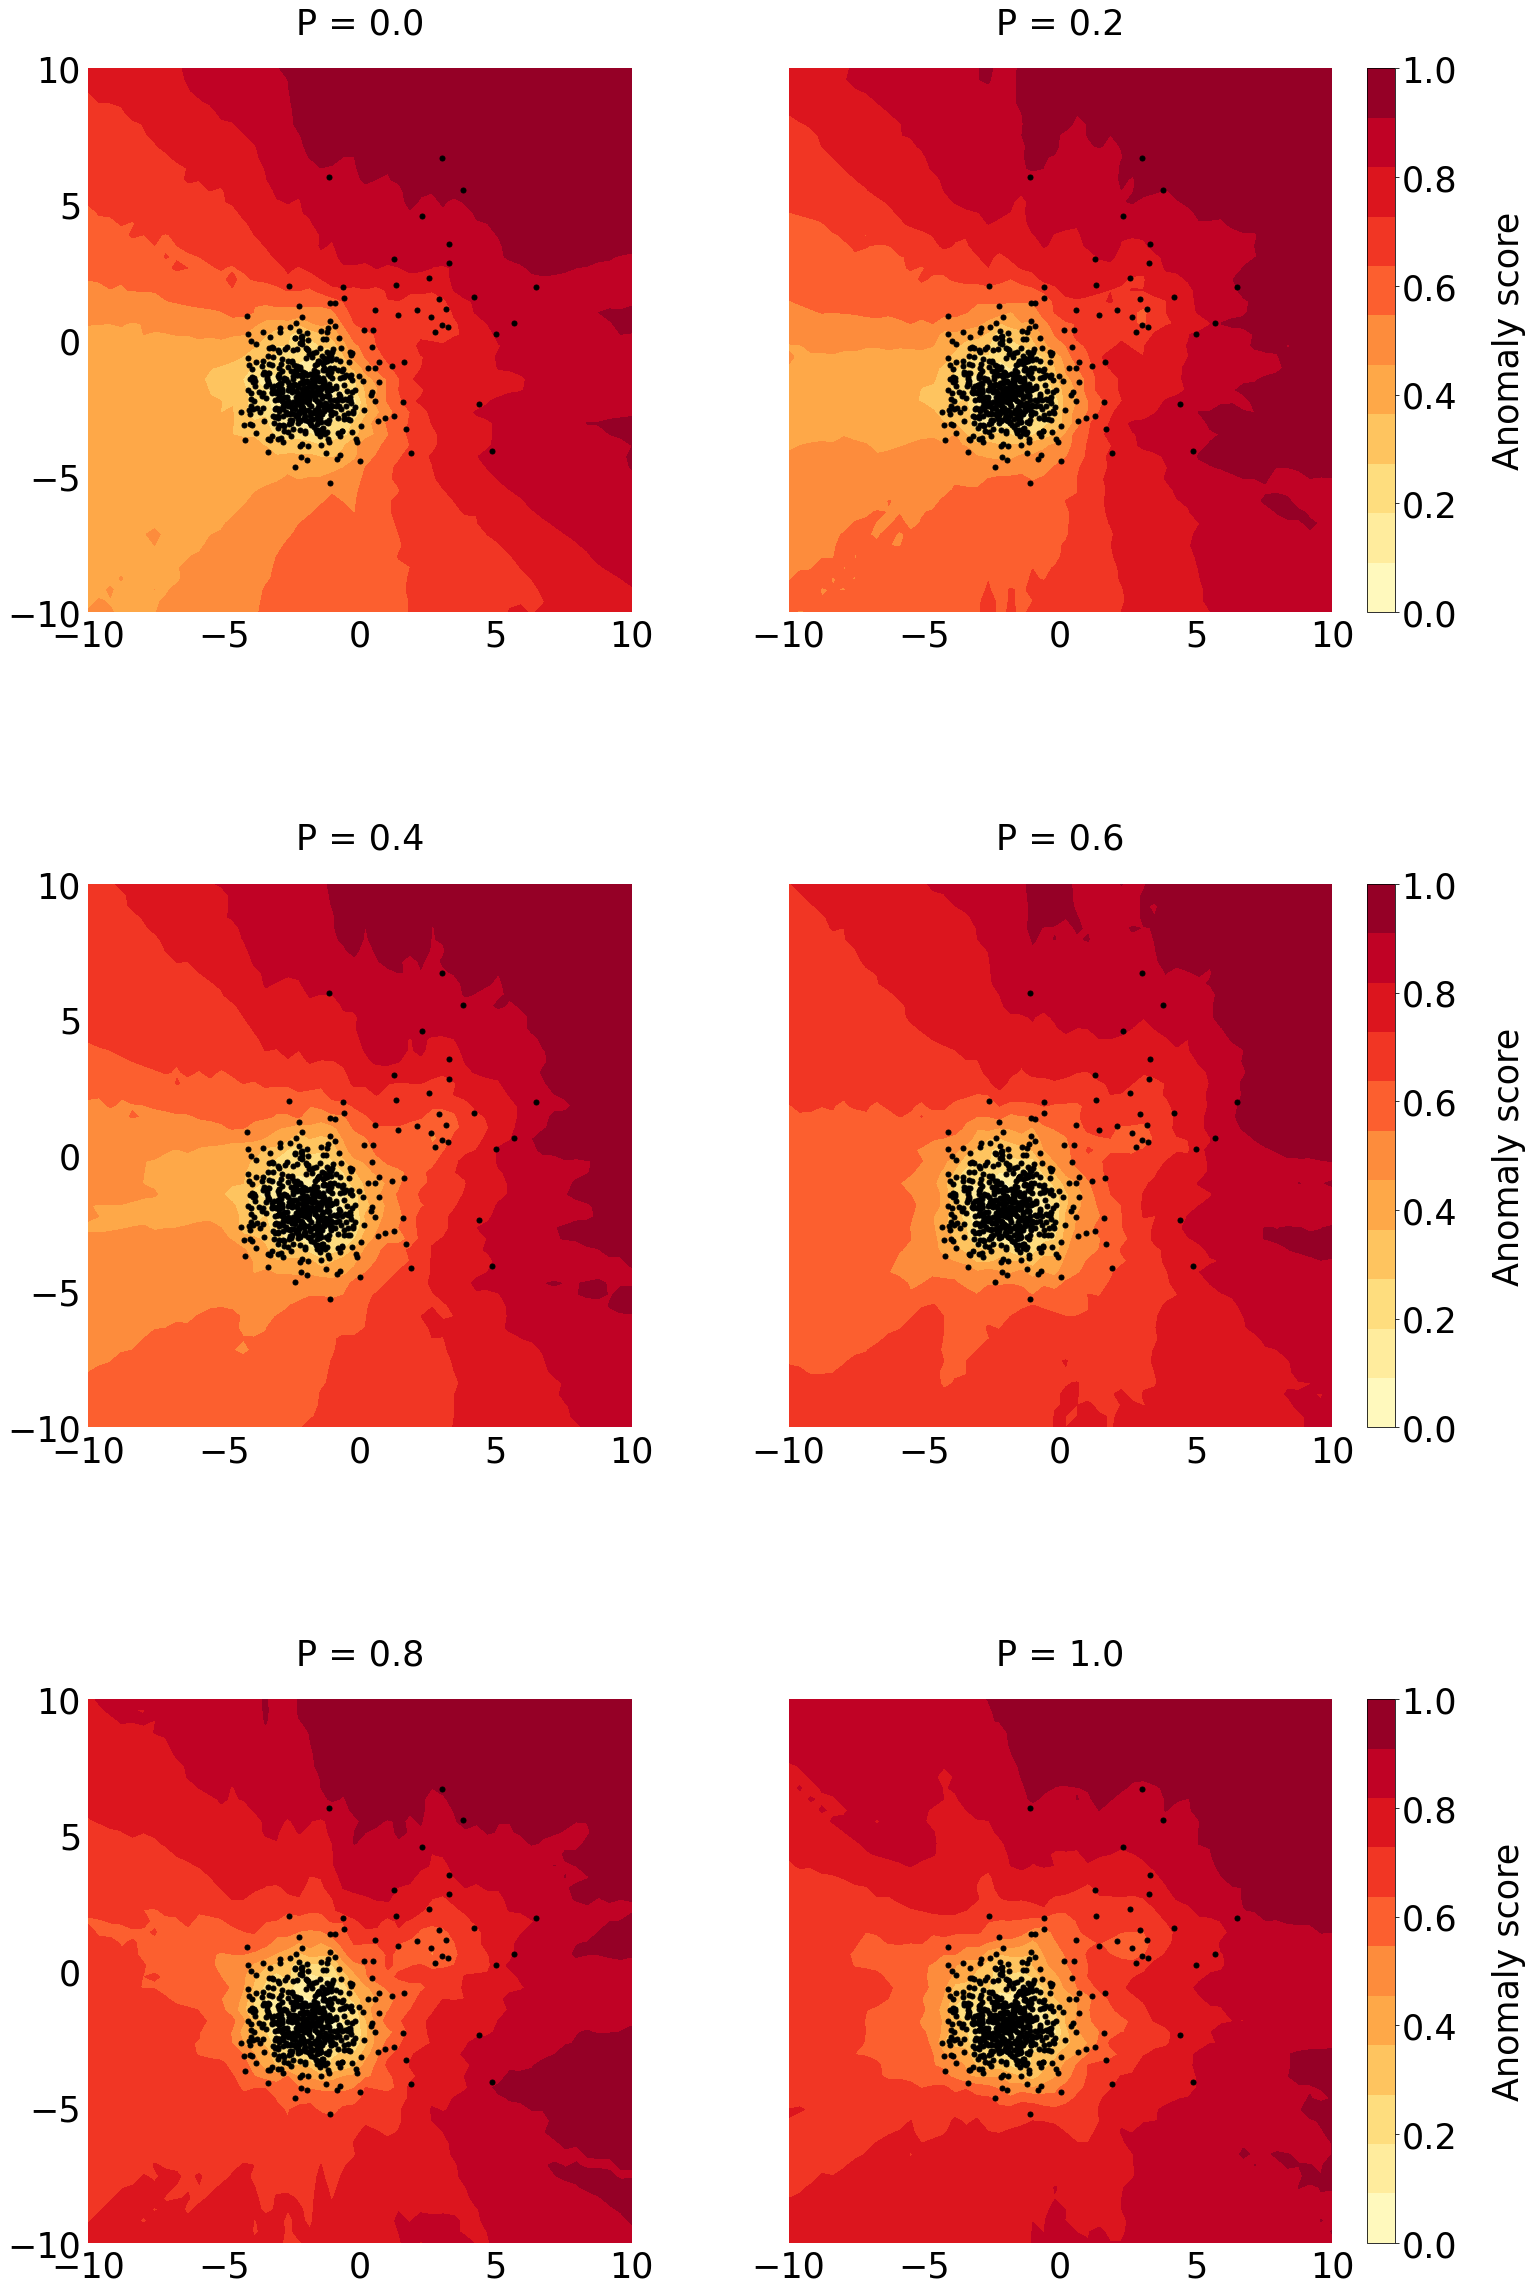

In [60]:
import matplotlib.gridspec as gridspec
f = plt.figure(figsize=(25, 40))
fontsize = 35
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1.25])

def plot_heatmap(heatmap_data, subplot, title, show_cbar=False): 
    ax1 = f.add_subplot(subplot)
    levels = np.linspace(0,1,12, endpoint=True)
    v = np.linspace(0, 1, 12, endpoint=True)
    v = np.around(v, decimals=1)
    CS = ax1.contourf(xx, yy, heatmap_data, levels, cmap=plt.cm.YlOrRd)
    if show_cbar: 
        cbar = plt.colorbar(CS, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
        cbar.ax.set_ylabel('Anomaly score', fontsize =fontsize, labelpad=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        ax1.tick_params(axis='y', labelleft=False)
    plt.tick_params(labelsize=fontsize)
    plt.scatter(data[:,0],data[:,1],s=25,c='k')
    ax1.set_aspect('equal', adjustable='box')
    plt.title(title,  fontsize=fontsize, pad=35)
    ax1.spines['top'].set_color(None)
    ax1.spines['bottom'].set_color(None)
    ax1.spines['right'].set_color(None)
    ax1.spines['left'].set_color(None)
    ax1.tick_params(left=False, bottom=False)

plot_heatmap(heatmap5, gs[0], "P = 0.0")
plot_heatmap(heatmap,  gs[1], "P = 0.2", True)
plot_heatmap(heatmap1, gs[2], "P = 0.4")
plot_heatmap(heatmap2, gs[3], "P = 0.6", True)
plot_heatmap(heatmap3, gs[4], "P = 0.8")
plot_heatmap(heatmap4, gs[5], "P = 1.0", True)


plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()